# Dissolve census polygon's
- Generate one large GIS polygon for the entire city of SF
- Use as the first filter to retain tweets with lat - lon coordinates that reside in SF

*Author: Koki Sasagawa*  
*Last modified: 3/31/2019*

In [1]:
import networkx as nx
import geopandas as gpd
import numpy as np
import pandas as pd
import os 
import sys
import json
from shapely.geometry import Point
from matplotlib import pyplot as plt

%matplotlib inline 

In [2]:
# Specify temp data path
temp_data_dir = '../../temp_data/'

In [3]:
data_files = os.listdir(temp_data_dir)

for i, j in enumerate(data_files):
    print(i, j)      

0 test.csv
1 sfdata_mapped
2 dummy_df.csv
3 sf_filtered_census_data.shx
4 sf_filtered_census_data.shp
5 sf_filtered_census_data.cpg
6 sf_GEOID_GIS_data.shx
7 sf_GEOID_GIS_data.shp
8 sf_GEOID_GIS_data.cpg
9 test1.csv
10 sf_GEOID_GIS_data.dbf
11 region_data
12 sf_filtered_census_data.dbf
13 sfdata_clean


In [4]:
sf_census_zones = gpd.GeoDataFrame.from_file(temp_data_dir + data_files[7])
print('Size of census zones df: {}'.format(sf_census_zones.shape))
sf_census_zones.head()

Size of census zones df: (196, 2)


,geoid10,geometry
0,6075016500,"POLYGON ((-122.446471 37.775802, -122.44478 37..."
1,6075016400,"POLYGON ((-122.44034 37.77658, -122.439844 37...."
2,6075016300,"POLYGON ((-122.429152 37.778007, -122.428909 3..."
3,6075016100,"POLYGON ((-122.428909 37.778039, -122.429152 3..."
4,6075016000,"POLYGON ((-122.420425 37.780583, -122.420336 3..."


In [5]:
sf_census_zones.geom_type.unique()

array(['Polygon'], dtype=object)

In [6]:
sf_census_zones['key'] = np.ones(len(sf_census_zones))
sf_census_zones.head()

,geoid10,geometry,key
0,6075016500,"POLYGON ((-122.446471 37.775802, -122.44478 37...",1.0
1,6075016400,"POLYGON ((-122.44034 37.77658, -122.439844 37....",1.0
2,6075016300,"POLYGON ((-122.429152 37.778007, -122.428909 3...",1.0
3,6075016100,"POLYGON ((-122.428909 37.778039, -122.429152 3...",1.0
4,6075016000,"POLYGON ((-122.420425 37.780583, -122.420336 3...",1.0


In [7]:
sf_polygon = sf_census_zones.dissolve('key')['geometry']

In [11]:
sf_polygon

key
1.0    POLYGON ((-122.435382 37.708132, -122.435882 3...
Name: geometry, dtype: object

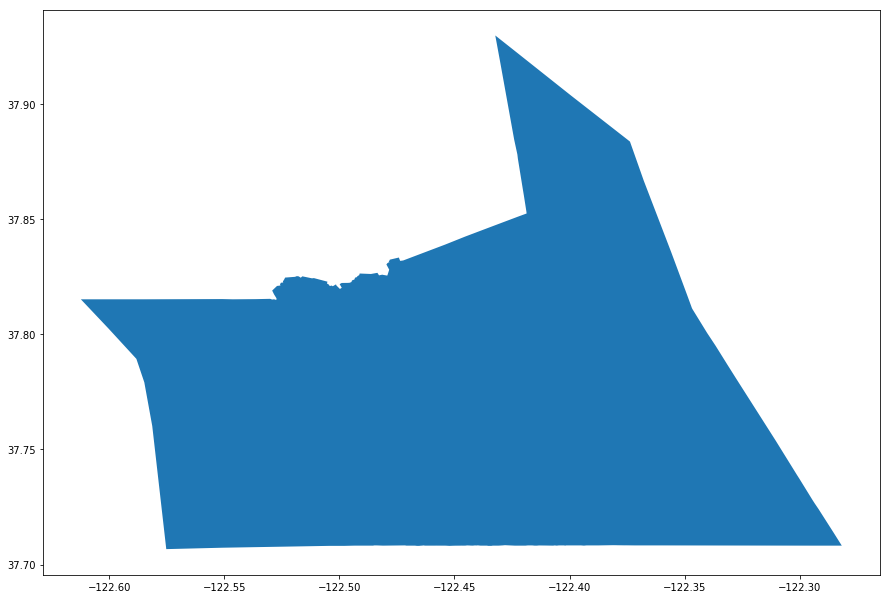

In [9]:
sf_polygon.plot(figsize=(15,15))

# Create function to check if Point belongs in Polygon

In [15]:
data_files = os.listdir(temp_data_dir + 'sfdata_clean/')

for i, j in enumerate(data_files):
    print(i, j)    

0 sfmtaAVLRawData02252016.csv
1 sfmtaAVLRawData02132016.csv
2 sfmtaAVLRawData02032016.csv
3 sfmtaAVLRawData02022016.csv
4 sfmtaAVLRawData02122016.csv
5 sfmtaAVLRawData02242016.csv
6 sfmtaAVLRawData02102016.csv
7 sfmtaAVLRawData02262016.csv
8 sfmtaAVLRawData02092016.csv
9 sfmtaAVLRawData02192016.csv
10 sfmtaAVLRawData02272016.csv
11 sfmtaAVLRawData02182016.csv
12 sfmtaAVLRawData02082016.csv
13 sfmtaAVLRawData02012016.csv
14 sfmtaAVLRawData02112016.csv
15 sfmtaAVLRawData02142016.csv
16 sfmtaAVLRawData02042016.csv
17 sfmtaAVLRawData02222016.csv
18 sfmtaAVLRawData02232016.csv
19 sfmtaAVLRawData02052016.csv
20 sfmtaAVLRawData02152016.csv
21 sfmtaAVLRawData02212016.csv
22 sfmtaAVLRawData02172016.csv
23 sfmtaAVLRawData02072016.csv
24 sfmtaAVLRawData02282016.csv
25 sfmtaAVLRawData02062016.csv
26 sfmtaAVLRawData02162016.csv
27 sfmtaAVLRawData02292016.csv
28 sfmtaAVLRawData02202016.csv


In [19]:
test_file = pd.read_csv(temp_data_dir + 'sfdata_clean/' + data_files[0])
print('Size of df: {}'.format(test_file.shape))
test_file.head()

/Users/koki/Documents/Learning/UMICH_Courses/SI_699_Big_Data/rushhour_2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Size of df: (1444298, 9)


,REV,REPORT_TIME,VEHICLE_TAG,LONGITUDE,LATITUDE,SPEED,HEADING,TRAIN_ASSIGNMENT,PREDICTABLE
0,1515,02/25/2016 00:00:56,1,-122.41150,37.79491,0.0,131.0,NaN,0
1,1515,02/25/2016 00:02:26,1,-122.41145,37.79496,0.0,7.0,NaN,0
2,1515,02/25/2016 00:03:56,1,-122.41147,37.79476,0.0,176.0,NaN,0
3,1515,02/25/2016 00:05:26,1,-122.41164,37.79475,0.0,138.0,NaN,0
4,1515,02/25/2016 00:06:56,1,-122.41181,37.79505,0.0,286.0,NaN,0


In [21]:
point = Point(test_file["LONGITUDE"][0], test_file['LATITUDE'][0])

In [30]:
print(sf_polygon.iloc[0].contains(point))

True


In [52]:
type(sf_polygon.iloc[0])
sf_polygon.to_file(temp_data_dir + 'sf_all_census_zones.shp')

In [37]:
def filter_coordinates(lon, lat, region):
    """Accept lon, lat coordinates of a Point and checks if they belong in a region Polygon 
    
    Convert lon,lat into GIS Point, then usig the GeoShape query contains check to see if a 
    GIS Polygon contains that Point. 
    
    :param float lon: longitude
    :param float lat: latitude
    :param region: region of interest 
    :type region: shapely.geometry.polygon.Polygon
    :return: True if Polygon contains Point, False otherwise 
    :rtype: bool
    """
    
    point = Point(lon, lat)
    return region.contains(point)